In [262]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, log_loss
import shap

ModuleNotFoundError: No module named 'xgboost'

In [223]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# Task 1 - EDA

In [224]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [346]:
nums = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

In [226]:
df[nums].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [337]:
df[cats].describe().transpose()

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


## Univariate Analysis

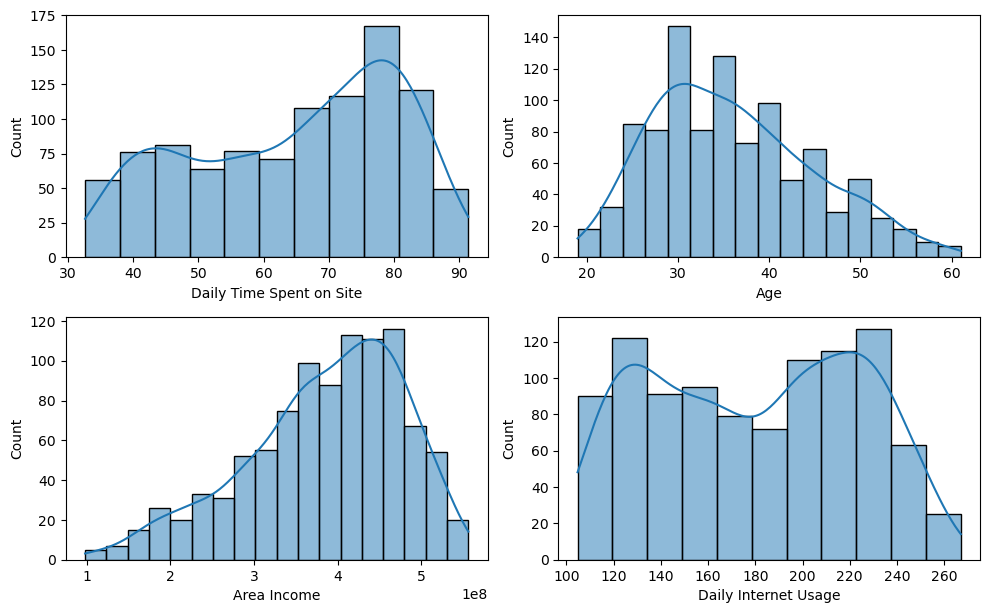

In [349]:
plt.figure(figsize=(10, 30))
for i in range(0, len(nums)):
    plt.subplot(10, 2, i+1)
    sns.histplot(df[nums[i]], kde=True)
    plt.tight_layout()

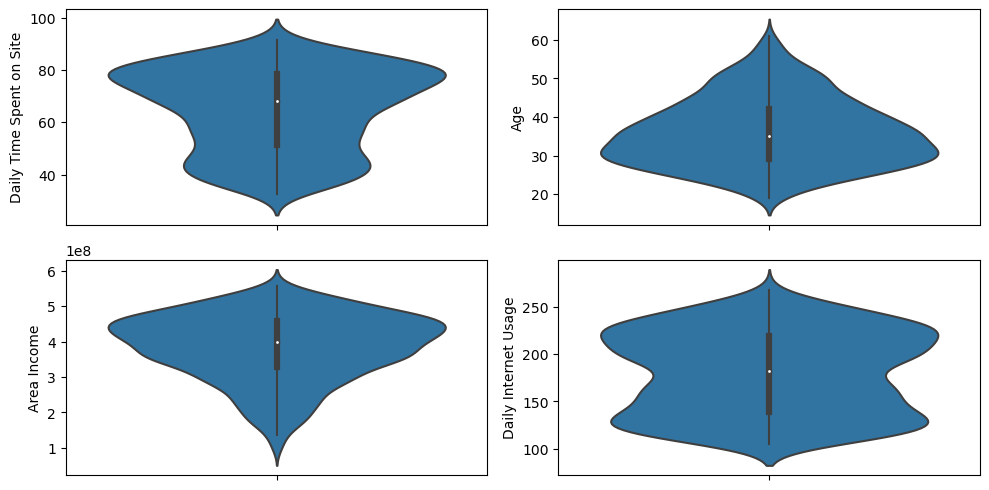

In [351]:
plt.figure(figsize=(10, 30))
for i in range(0, len(nums)):
    plt.subplot(12, 2, i+1)
    sns.violinplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

## Bivariate Analysis

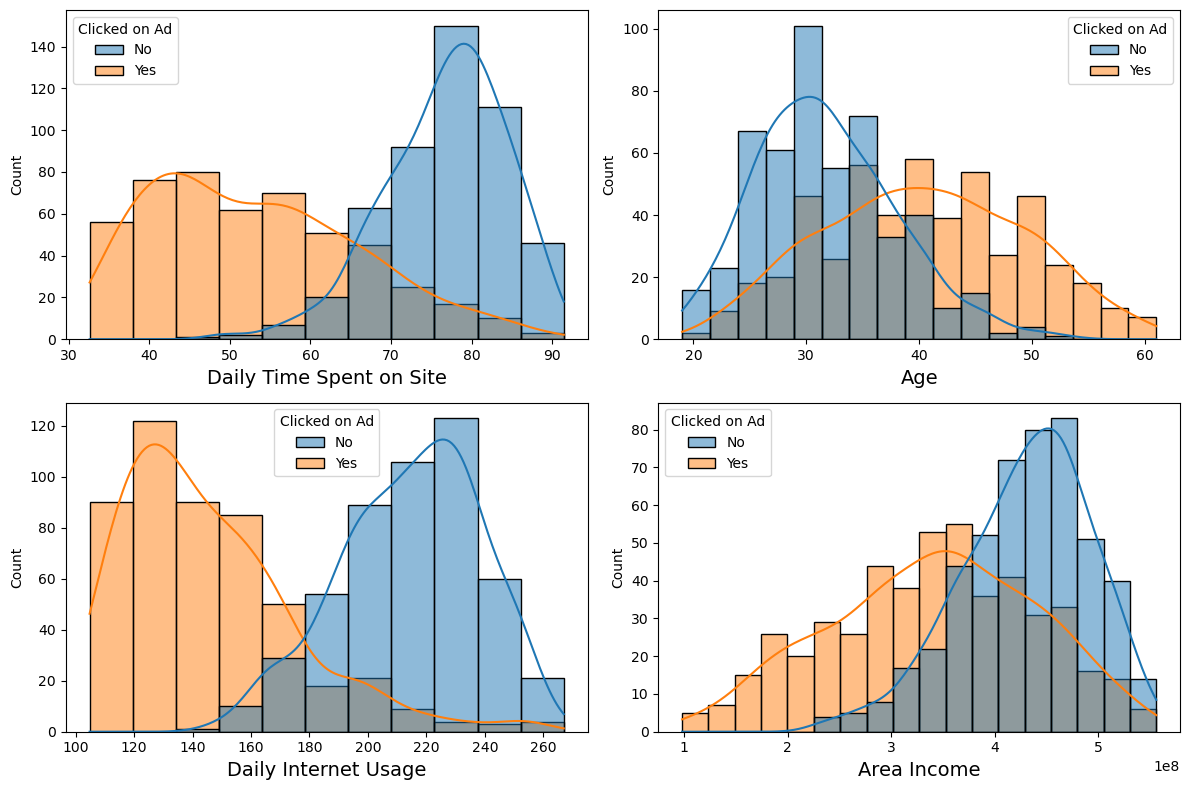

In [229]:
plt.figure(figsize=(12, 8))
features = ['Daily Time Spent on Site',	'Age','Daily Internet Usage','Area Income']

for i in range(0,len(features)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[features[i]], hue=df['Clicked on Ad'], kde=True)
    plt.xlabel(features[i], fontsize=14)
    plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

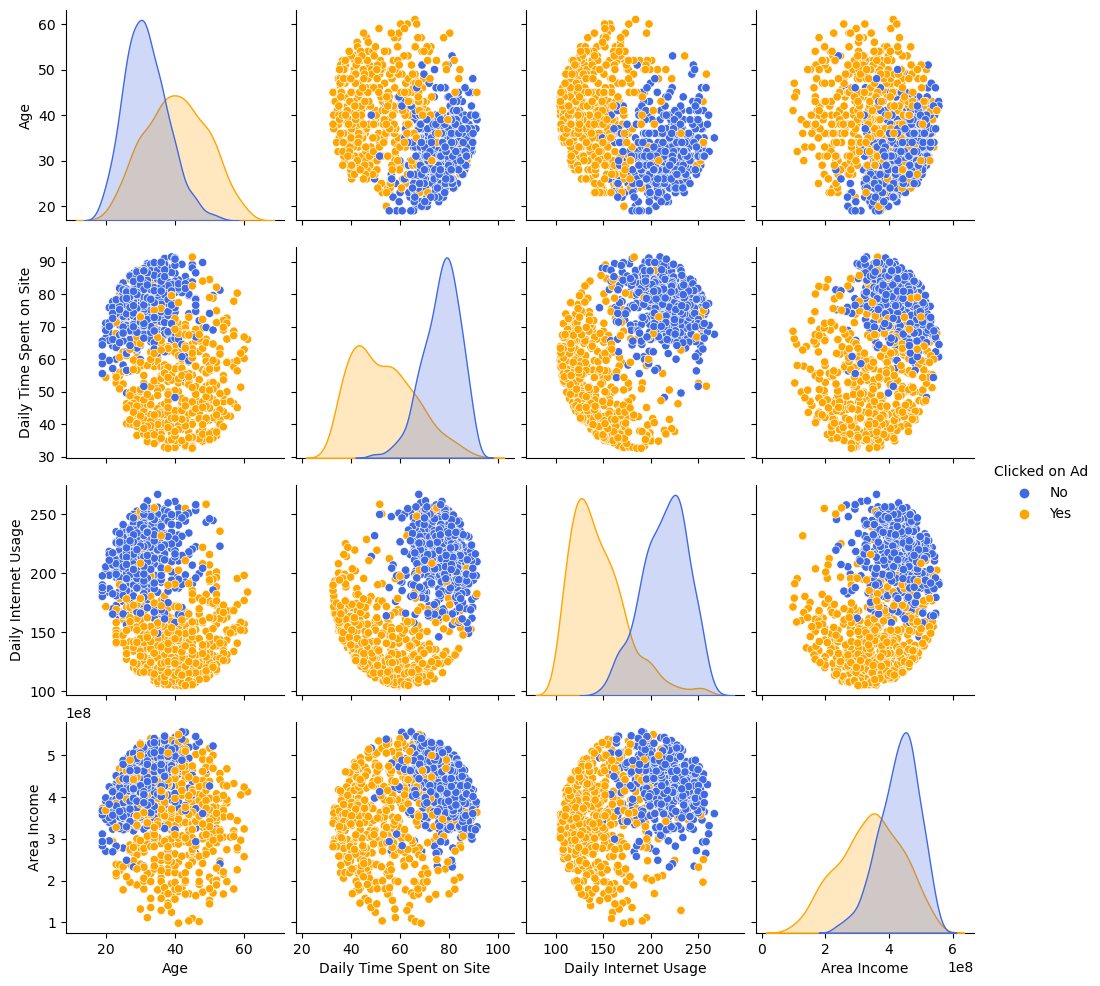

In [345]:
plt.figure(figsize=(15,15))
sns.pairplot(df[['Age', 'Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income','Clicked on Ad']], diag_kind='kde', hue='Clicked on Ad', palette=colors)
plt.show()

## Multivariate Analysis

In [231]:
df.corr()

C:\Users\Win10pro\AppData\Local\Temp\ipykernel_11288\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Unnamed: 0,1.000000,-0.032637,0.001835,-0.056862,-0.004842
Daily Time Spent on Site,-0.032637,1.000000,-0.331424,0.308266,0.518294
Age,0.001835,-0.331424,1.000000,-0.179343,-0.370481
Area Income,-0.056862,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,-0.004842,0.518294,-0.370481,0.338080,1.000000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

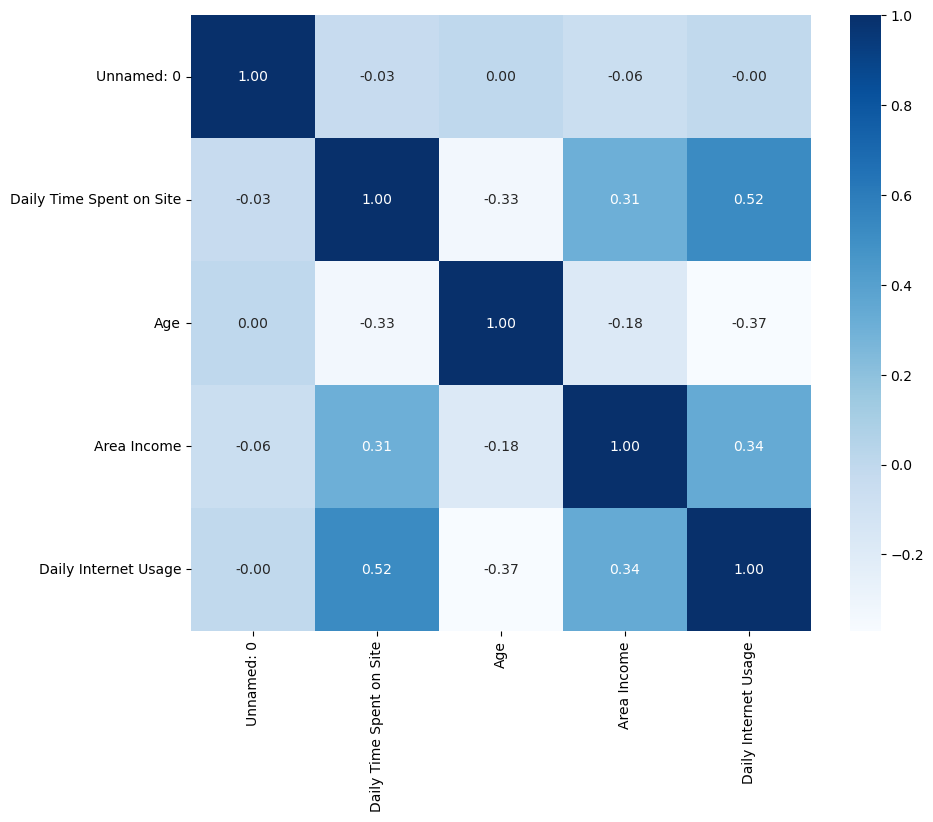

In [339]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

# Task 2 - Data Pre-Processing

In [233]:
df2 = df.copy()

In [234]:
df2.columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category'],
      dtype='object')

In [235]:
df2['Timestamp'] = pd.to_datetime(df['Timestamp'])

df2.rename(columns={'Male': 'Gender'}, inplace=True)

df2.drop(columns= 'Unnamed: 0', inplace=True)

## Handling Missing Value

In [236]:
df2.isna().sum().sort_values(ascending=False)

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Gender                       3
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [237]:
dfp = df2.isna().sum()*100/len(df2)
print(round(dfp, 2).sort_values(ascending=False))

Daily Time Spent on Site    1.3
Area Income                 1.3
Daily Internet Usage        1.1
Gender                      0.3
Age                         0.0
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64


In [238]:
df2['Daily Time Spent on Site'] = df2['Daily Time Spent on Site'].fillna(df2['Daily Time Spent on Site'].median())
df2['Area Income'] = df2['Area Income'].fillna(df2['Area Income'].median())
df2['Daily Internet Usage'] = df2['Daily Internet Usage'].fillna(df2['Daily Internet Usage'].median())
df2['Gender'] = df2['Gender'].fillna(df2['Gender'].mode()[0])

In [239]:
df2.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Handling Duplicate

In [240]:
df2.duplicated().any()

False

## Handling Outlier

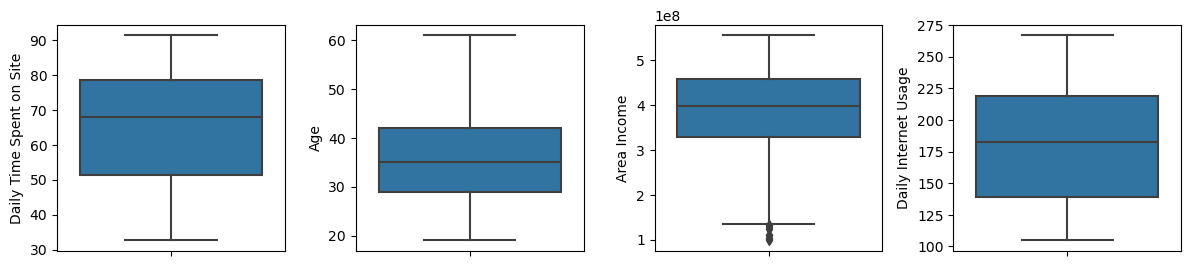

In [241]:
nums =  ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
plt.figure(figsize=(15, 30))
for i in range(0, len(nums)):
    plt.subplot(12, 5, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

In [242]:
print(f'Total Rows BEFORE Outlier Handling Z-Score = {len(df2)}')
filtered_entries = np.array([True] * len(df2))
column = ['Area Income']

for col in column:
    zscore = abs(stats.zscore(df2[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df2 = df2[filtered_entries] 
print(f'Total Rows AFTER Outlier Handling Z-Score = {len(df2)}')

Total Rows BEFORE Outlier Handling Z-Score = 1000
Total Rows AFTER Outlier Handling Z-Score = 997


## Feature Extraction

In [243]:
df2['year'] = df2.Timestamp.dt.year
df2['month'] = df2.Timestamp.dt.month
df2['week'] = df2.Timestamp.dt.isocalendar().week
df2['day'] = df2.Timestamp.dt.day

In [244]:
dfe = df2.copy()
dfe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,year,month,week,day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,2016,2,6,11
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,2016,4,16,22
997,68.11,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,2016,2,5,1
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,2016,3,12,24


## Feature Encoding

In [245]:
# Gender
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1
}
dfe['Gender'] = dfe['Gender'].map(mapping_gender)

In [246]:
# Clicked on Ad
mapping_ads = {
    'No' : 0,
    'Yes' : 1
}
dfe['Clicked on Ad'] = dfe['Clicked on Ad'].map(mapping_ads)

## One Hot Encoding

In [247]:
for i in ['city','province','category']:
    onehots = pd.get_dummies(dfe[i], prefix=i)
    dfe = dfe.join(onehots)

## Feature Selection

In [248]:
dfe.drop(columns=['Timestamp', 'city', 'province', 'category'], inplace=True)

In [249]:
dfe.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,year,month,week,day,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,2016,3,12,27,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,2016,4,14,4,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,2016,3,10,13,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,2016,1,1,10,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,2016,6,22,3,...,0,0,0,1,0,0,0,0,0,0


## Splitting Data

In [250]:
dfs = dfe.copy()

In [251]:
X = dfs.drop(columns=['Clicked on Ad'])
y = dfs['Clicked on Ad']

In [252]:
print(X.shape)
print(y.shape)

(997, 65)
(997,)


In [253]:
y.value_counts()

0    500
1    497
Name: Clicked on Ad, dtype: int64

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [255]:
print('X_train size : ', X_train.shape)
print('X_test size  : ', X_test.shape)
print('y_train size : ', y_train.shape)
print('y_test size  : ', y_test.shape)

X_train size :  (697, 65)
X_test size  :  (300, 65)
y_train size :  (697,)
y_test size  :  (300,)


In [256]:
y_test.value_counts()

1    159
0    141
Name: Clicked on Ad, dtype: int64

# Task 3: Data Modelling

## Modelling Without Normalization & Standarization

In [257]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.5f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.5f" % accuracy_score(y_train, y_pred_train))
    
    print("Precision (Test Set): %.5f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.5f" % precision_score(y_train, y_pred_train))
    
    print("Recall (Test Set): %.5f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.5f" % recall_score(y_train, y_pred_train))
    
    print("F1-Score (Test Set): %.5f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.5f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.5f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.5f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

    
def cfm_test(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Test)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

def cfm_train(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    cnf_matrix = confusion_matrix(y_train, y_pred_train)
    print(classification_report(y_train, y_pred_train))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Train)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(5).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Logistic Regression

In [258]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.47000
Accuracy (Train Set): 0.51506
Precision (Test Set): 0.00000
Precision (Train Set): 0.00000
Recall (Test Set): 0.00000
Recall (Train Set): 0.00000
F1-Score (Test Set): 0.00000
F1-Score (Train Set): 0.00000
roc_auc (test-proba): 0.75177
roc_auc (train-proba): 0.77615
roc_auc (crossval train): 0.7678920041011101
roc_auc (crossval test): 0.7677917171717172


C:\Users\Win10pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Win10pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Win10pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Win10pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Win10pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.52      1.00      0.68       359
           1       0.00      0.00      0.00       338

    accuracy                           0.52       697
   macro avg       0.26      0.50      0.34       697
weighted avg       0.27      0.52      0.35       697



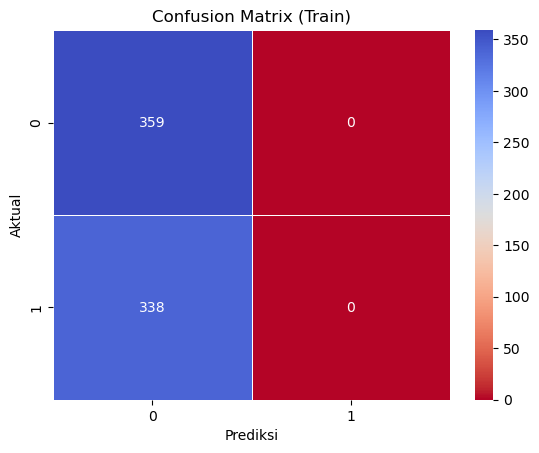

In [263]:
cfm_train(logreg)

C:\Users\Win10pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Win10pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Win10pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.47      1.00      0.64       141
           1       0.00      0.00      0.00       159

    accuracy                           0.47       300
   macro avg       0.23      0.50      0.32       300
weighted avg       0.22      0.47      0.30       300



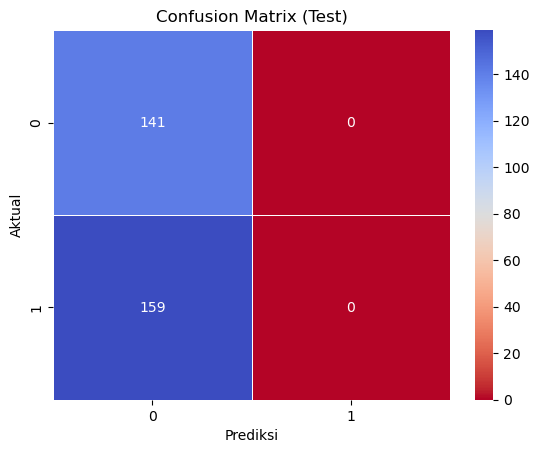

In [264]:
cfm_test(logreg)

### Decision Tree

In [265]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.94000
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.94340
Precision (Train Set): 1.00000
Recall (Test Set): 0.94340
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.94340
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.93978
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9418181818181818


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



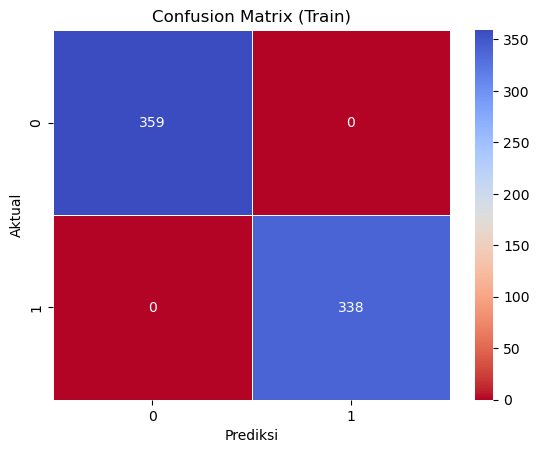

In [266]:
cfm_train(dt)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       141
           1       0.94      0.94      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



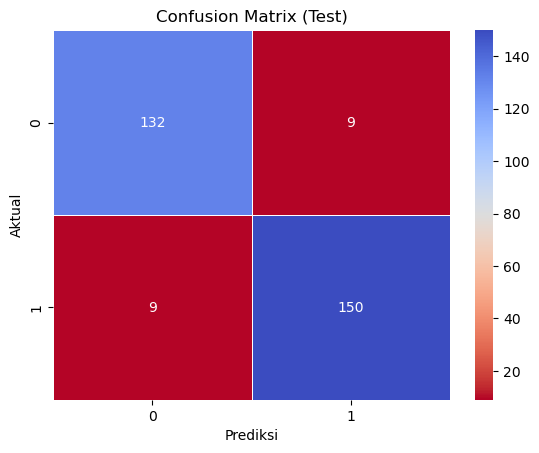

In [267]:
cfm_test(dt)

### Random Forest

In [268]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.95667
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.96203
Precision (Train Set): 1.00000
Recall (Test Set): 0.95597
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.95899
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.98544
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9901546464646465


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



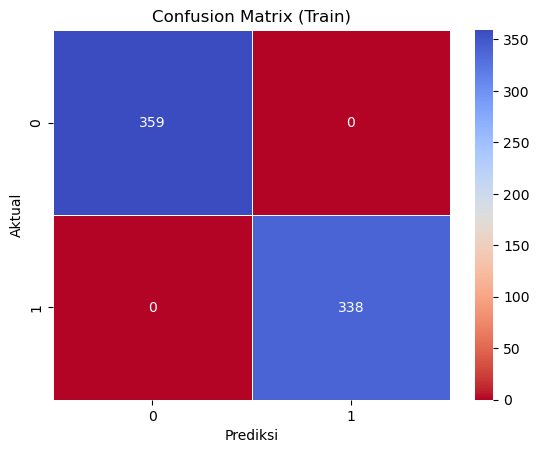

In [269]:
cfm_train(rf)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       141
           1       0.96      0.96      0.96       159

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



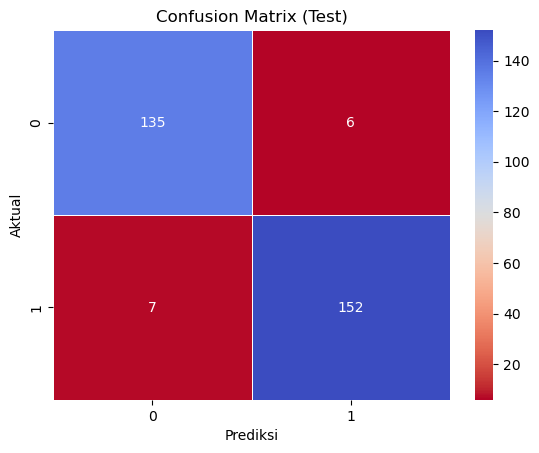

In [270]:
cfm_test(rf)

### K-Nearest Neighbor

In [271]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.63000
Accuracy (Train Set): 0.78766
Precision (Test Set): 0.68750
Precision (Train Set): 0.81667
Recall (Test Set): 0.55346
Recall (Train Set): 0.72485
F1-Score (Test Set): 0.61324
F1-Score (Train Set): 0.76803
roc_auc (test-proba): 0.66812
roc_auc (train-proba): 0.86955
roc_auc (crossval train): 0.8503026166727846
roc_auc (crossval test): 0.7055148484848486


              precision    recall  f1-score   support

           0       0.77      0.85      0.80       359
           1       0.82      0.72      0.77       338

    accuracy                           0.79       697
   macro avg       0.79      0.79      0.79       697
weighted avg       0.79      0.79      0.79       697



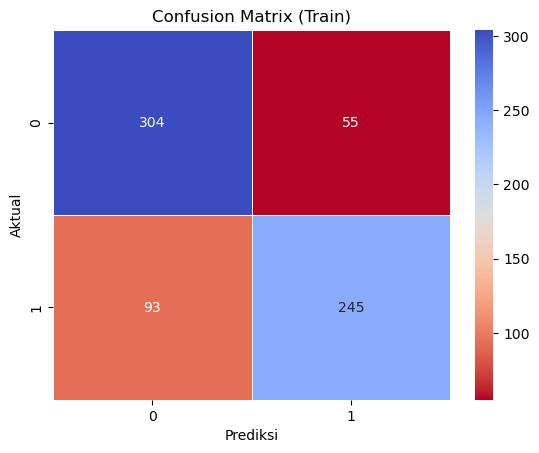

In [272]:
cfm_train(knn)

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       141
           1       0.69      0.55      0.61       159

    accuracy                           0.63       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.64      0.63      0.63       300



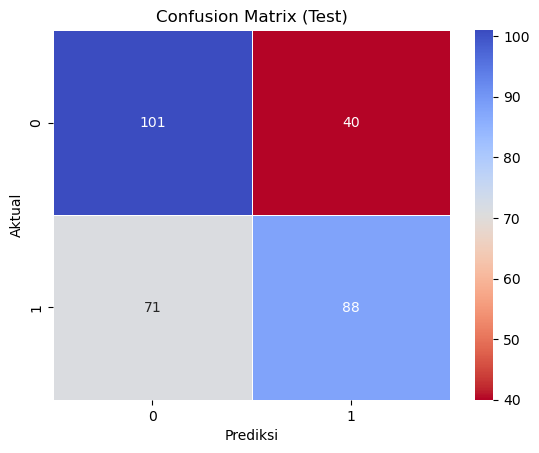

In [273]:
cfm_test(knn)

### Gradient Boosting

In [274]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
eval_classification(gb)

Accuracy (Test Set): 0.96667
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.97452
Precision (Train Set): 1.00000
Recall (Test Set): 0.96226
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.96835
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.98385
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9866717171717172


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



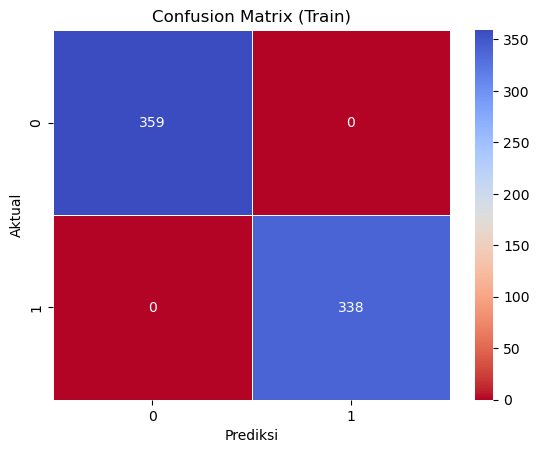

In [275]:
cfm_train(gb)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       141
           1       0.97      0.96      0.97       159

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



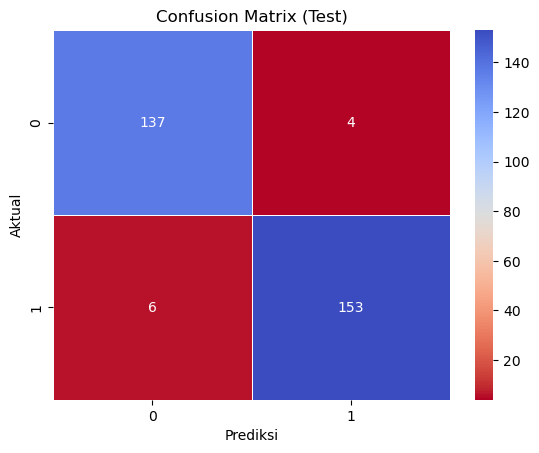

In [352]:
cfm_test(gb)

## Modelling With Normalization & Standarization

In [277]:
X_scaled = X.copy()
y_scaled = y.copy()

In [278]:
X_scaled['Daily Time Spent on Site'] = MinMaxScaler().fit_transform(X_scaled['Daily Time Spent on Site'].values.reshape(len(X), 1))
X_scaled['Age'] = MinMaxScaler().fit_transform(X_scaled['Age'].values.reshape(len(X), 1))
X_scaled['Area Income'] = MinMaxScaler().fit_transform(X_scaled['Area Income'].values.reshape(len(X), 1))
X_scaled['Daily Internet Usage'] = MinMaxScaler().fit_transform(X_scaled['Daily Internet Usage'].values.reshape(len(X), 1))
X_scaled['year'] = MinMaxScaler().fit_transform(X_scaled['year'].values.reshape(len(X), 1))
X_scaled['month'] = MinMaxScaler().fit_transform(X_scaled['month'].values.reshape(len(X), 1))
X_scaled['week'] = MinMaxScaler().fit_transform(X_scaled['day'].values.reshape(len(X), 1))
X_scaled['day'] = MinMaxScaler().fit_transform(X_scaled['day'].values.reshape(len(X), 1))

In [279]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3, random_state = 42)

In [280]:
X_train_scaled.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,year,month,week,day,city_Balikpapan,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.0,697.000000,697.000000,697.000000,697.000000,...,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,0.558063,0.406402,0.613954,0.474361,0.472023,0.0,0.470827,0.470253,0.470253,0.017217,...,0.088953,0.086083,0.113343,0.086083,0.101865,0.097561,0.094692,0.114778,0.113343,0.103300
std,0.266129,0.210312,0.209461,0.271967,0.499575,0.0,0.324884,0.288633,0.288633,0.130171,...,0.284880,0.280688,0.317239,0.280688,0.302688,0.296933,0.292999,0.318982,0.317239,0.304569
min,0.000000,0.000000,0.000000,0.001603,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.335713,0.238095,0.486730,0.221846,0.000000,0.0,0.166667,0.233333,0.233333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.613972,0.380952,0.648204,0.499723,0.000000,0.0,0.500000,0.466667,0.466667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.783614,0.547619,0.775165,0.717685,1.000000,0.0,0.833333,0.700000,0.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.998980,1.000000,1.000000,0.966159,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [281]:
X_test_scaled.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,year,month,week,day,city_Balikpapan,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.532499,0.399762,0.629947,0.436596,0.493333,0.0,0.463889,0.511556,0.511556,0.020000,...,0.093333,0.123333,0.073333,0.103333,0.093333,0.100000,0.126667,0.093333,0.110000,0.083333
std,0.271758,0.206898,0.199052,0.261621,0.500791,0.0,0.312759,0.295563,0.295563,0.140234,...,0.291385,0.329369,0.261118,0.304902,0.291385,0.300501,0.333155,0.291385,0.313413,0.276847
min,0.000000,0.023810,0.103425,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.289988,0.238095,0.509947,0.200271,0.000000,0.0,0.166667,0.266667,0.266667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.582781,0.380952,0.659607,0.422980,0.000000,0.0,0.500000,0.516667,0.516667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.752890,0.523810,0.786018,0.657847,1.000000,0.0,0.666667,0.766667,0.766667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.976190,0.978214,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [283]:
def eval_std_classification(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)
    
    print("Accuracy (Test Set): %.5f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.5f" % accuracy_score(y_train, y_pred_train))
    
    print("Precision (Test Set): %.5f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.5f" % precision_score(y_train, y_pred_train))
    
    print("Recall (Test Set): %.5f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.5f" % recall_score(y_train, y_pred_train))
    
    print("F1-Score (Test Set): %.5f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.5f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.5f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.5f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

    
def cfm_std_test(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Test)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

def cfm_std_train(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)
    cnf_matrix = confusion_matrix(y_train, y_pred_train)
    print(classification_report(y_train, y_pred_train))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Train)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

### Logistic Regression

In [284]:
logreg_std = LogisticRegression(random_state = 42)#, class_weight='balanced')
logreg_std.fit(X_train_scaled, y_train)
eval_std_classification(logreg_std)

Accuracy (Test Set): 0.96000
Accuracy (Train Set): 0.97561
Precision (Test Set): 0.98039
Precision (Train Set): 0.99083
Recall (Test Set): 0.94340
Recall (Train Set): 0.95858
F1-Score (Test Set): 0.96154
F1-Score (Train Set): 0.97444
roc_auc (test-proba): 0.98425
roc_auc (train-proba): 0.99415
roc_auc (crossval train): 0.7678920041011101
roc_auc (crossval test): 0.7677917171717172


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       359
           1       0.99      0.96      0.97       338

    accuracy                           0.98       697
   macro avg       0.98      0.98      0.98       697
weighted avg       0.98      0.98      0.98       697



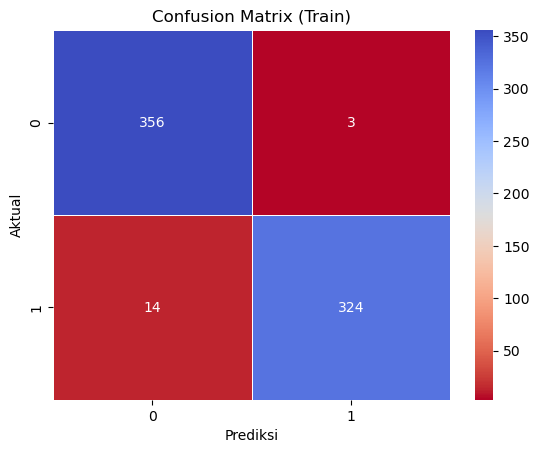

In [285]:
cfm_std_train(logreg_std)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       141
           1       0.98      0.94      0.96       159

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



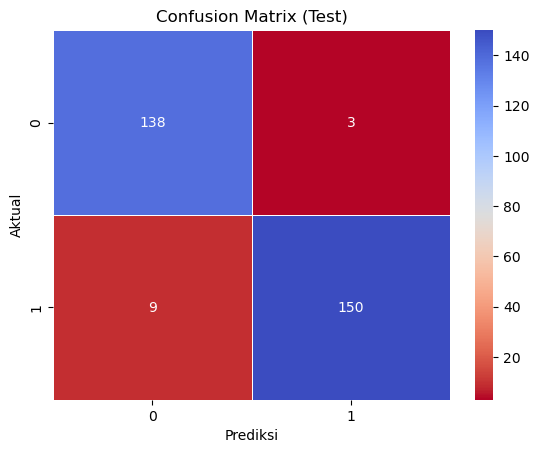

In [286]:
cfm_std_test(logreg_std)

### Decision Tree

In [287]:
dt_std = DecisionTreeClassifier(random_state=42)
dt_std.fit(X_train_scaled, y_train)
eval_std_classification(dt_std)

Accuracy (Test Set): 0.93667
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.93750
Precision (Train Set): 1.00000
Recall (Test Set): 0.94340
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.94044
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.93624
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9418181818181818


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



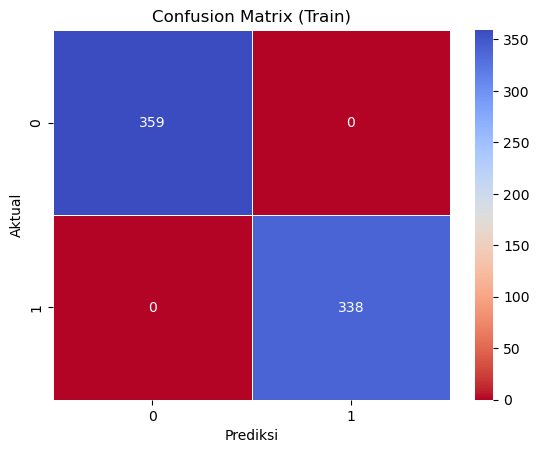

In [288]:
cfm_std_train(dt_std)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       141
           1       0.94      0.94      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



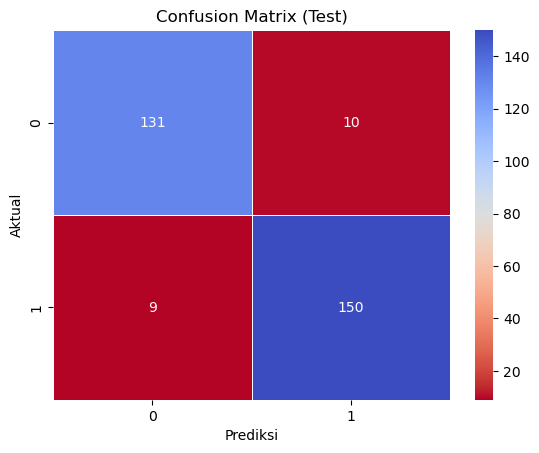

In [289]:
cfm_std_test(dt_std)

### Random Forest

In [290]:
rf_std = RandomForestClassifier(random_state=42)
rf_std.fit(X_train_scaled, y_train)
eval_std_classification(rf_std)

Accuracy (Test Set): 0.95000
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.96154
Precision (Train Set): 1.00000
Recall (Test Set): 0.94340
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.95238
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.98459
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9901546464646465


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



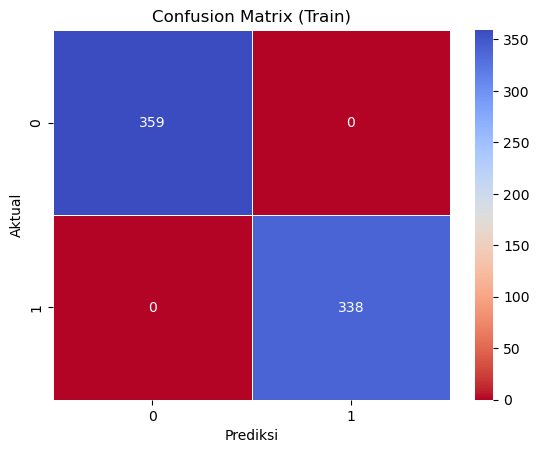

In [291]:
cfm_std_train(rf_std)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       141
           1       0.96      0.94      0.95       159

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



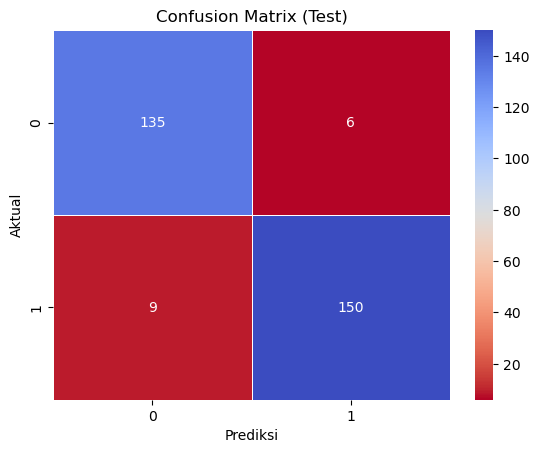

In [292]:
cfm_std_test(rf_std)

### K-Nearest Neighbor

In [293]:
knn_std = KNeighborsClassifier()
knn_std.fit(X_train_scaled, y_train)
eval_std_classification(knn_std)

Accuracy (Test Set): 0.75667
Accuracy (Train Set): 0.86514
Precision (Test Set): 0.81618
Precision (Train Set): 0.89869
Recall (Test Set): 0.69811
Recall (Train Set): 0.81361
F1-Score (Test Set): 0.75254
F1-Score (Train Set): 0.85404
roc_auc (test-proba): 0.81277
roc_auc (train-proba): 0.92856
roc_auc (crossval train): 0.8503026166727846
roc_auc (crossval test): 0.7055148484848486


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       359
           1       0.90      0.81      0.85       338

    accuracy                           0.87       697
   macro avg       0.87      0.86      0.86       697
weighted avg       0.87      0.87      0.86       697



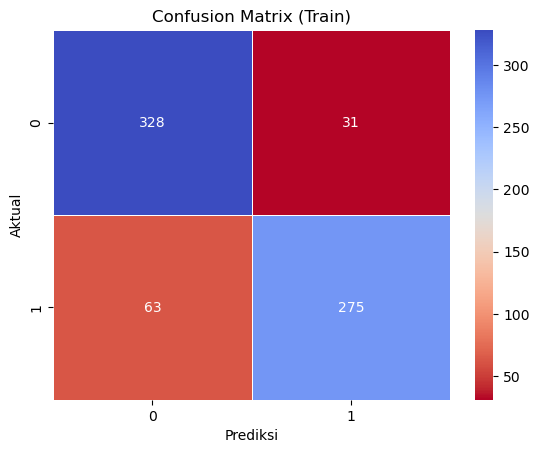

In [294]:
cfm_std_train(knn_std)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       141
           1       0.82      0.70      0.75       159

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



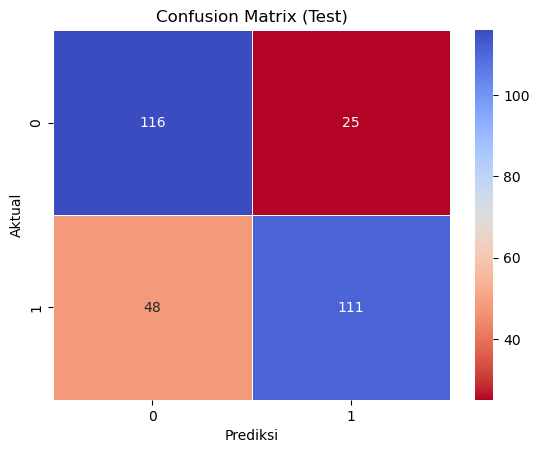

In [295]:
cfm_std_test(knn_std)

### Gradient Boosting

In [296]:
gb_std = GradientBoostingClassifier()
gb_std.fit(X_train_scaled, y_train)
eval_std_classification(gb_std)

Accuracy (Test Set): 0.96667
Accuracy (Train Set): 1.00000
Precision (Test Set): 0.97452
Precision (Train Set): 1.00000
Recall (Test Set): 0.96226
Recall (Train Set): 1.00000
F1-Score (Test Set): 0.96835
F1-Score (Train Set): 1.00000
roc_auc (test-proba): 0.98341
roc_auc (train-proba): 1.00000
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9866309090909091


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       338

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



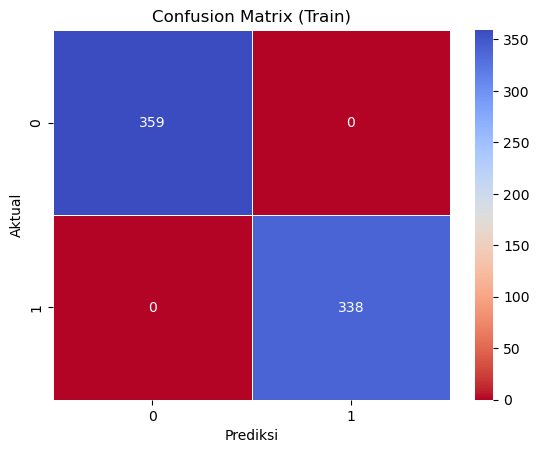

In [297]:
cfm_std_train(gb_std)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       141
           1       0.97      0.96      0.97       159

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



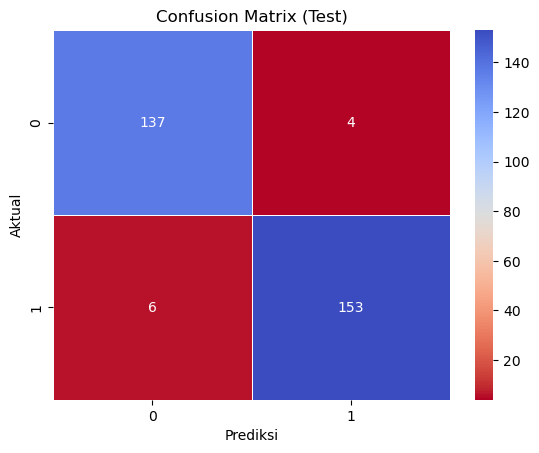

In [298]:
cfm_std_test(gb_std)

### Adaboost

In [303]:
ab_std = AdaBoostClassifier()
ab_std.fit(X_train_scaled, y_train)
eval_std_classification(ab_std)

Accuracy (Test Set): 0.95333
Accuracy (Train Set): 0.99426
Precision (Test Set): 0.96178
Precision (Train Set): 1.00000
Recall (Test Set): 0.94969
Recall (Train Set): 0.98817
F1-Score (Test Set): 0.95570
F1-Score (Train Set): 0.99405
roc_auc (test-proba): 0.98463
roc_auc (train-proba): 0.99995
roc_auc (crossval train): 0.999817699960761
roc_auc (crossval test): 0.9803533333333334


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       359
           1       1.00      0.99      0.99       338

    accuracy                           0.99       697
   macro avg       0.99      0.99      0.99       697
weighted avg       0.99      0.99      0.99       697



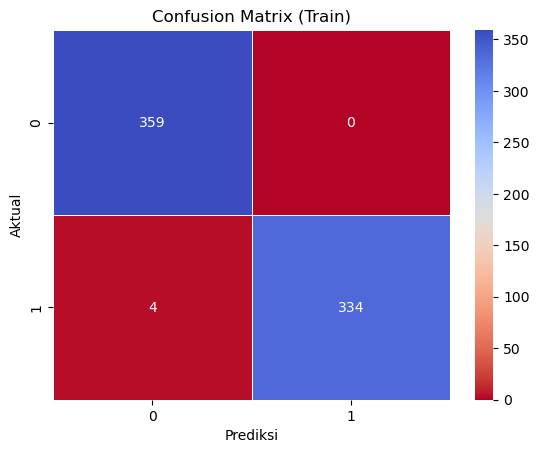

In [304]:
cfm_std_train(ab_std)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       141
           1       0.96      0.95      0.96       159

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



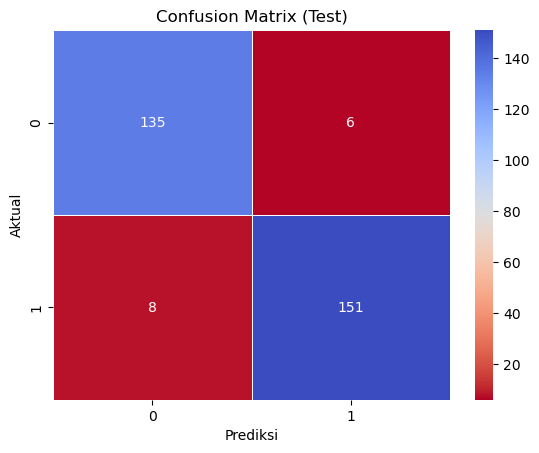

In [305]:
cfm_std_test(ab_std)

## Feature Importance

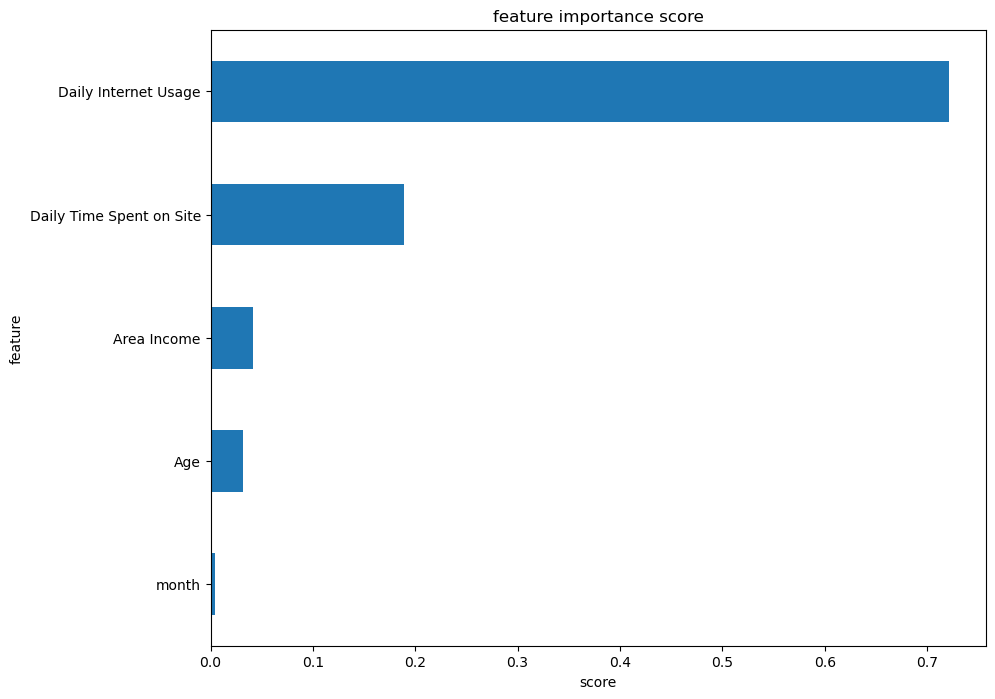

In [299]:
show_feature_importance(gb_std)

## Shap Value

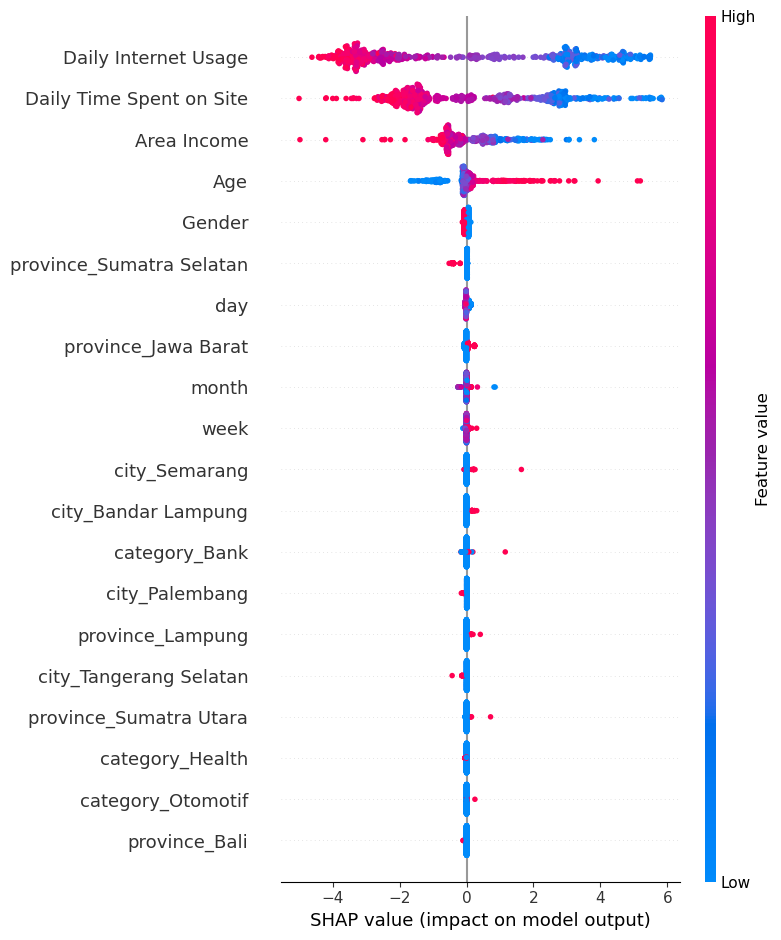

In [314]:
explainer = shap.TreeExplainer(gb_std)
shap_values = explainer.shap_values(X_train_scaled)
shap.summary_plot(shap_values, X_train_scaled)

In [319]:
x_sampled = X_train_scaled.sample(100, random_state=10)

In [320]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_sampled)

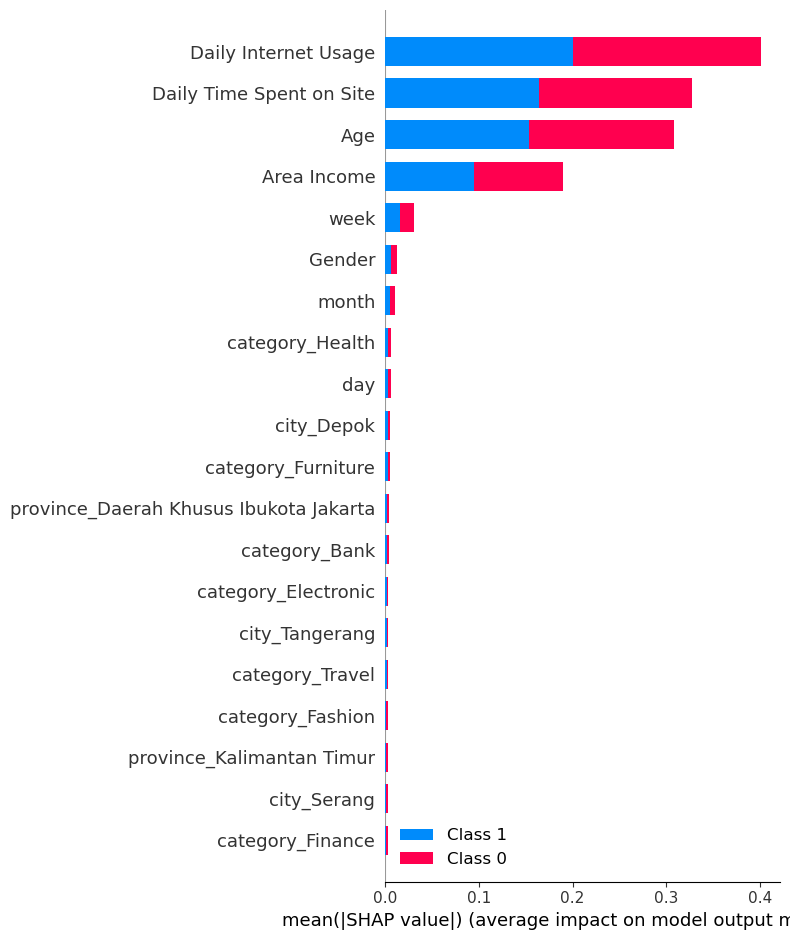

In [321]:
shap.summary_plot(shap_values, x_sampled)

# Task 4: Business Recommendation and Simulation

In [316]:
df4 = df.copy()

In [317]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


### Daily Internet Usage

In [324]:
diu = []
for x in df4['Daily Internet Usage']:
    if x >= 100 and x <= 140:
      stage = '100 - 140'
    elif x >= 141 and x <= 180:
      stage = '141 - 180'
    elif x >= 181 and x <= 225:
      stage = '181 - 225'
    else:
      stage = '> 225'
    diu.append(stage)

df4['diu_group'] = diu

In [325]:
dfd = df4.groupby(['Clicked on Ad', 'diu_group']).agg({'Age':'count'}).reset_index()
dfd = dfd.rename(columns={'Age':'Customers'})
dfd['sum'] = dfd['Customers'].sum()
dfd['percentage'] = round((dfd['Customers']/dfd['sum'])*100, 3)
dfd.sort_values(by=['Clicked on Ad'], ascending=False, inplace=True)
dfd

,Clicked on Ad,diu_group,Customers,sum,percentage
3,Yes,100 - 140,254,1000,25.4
4,Yes,141 - 180,179,1000,17.9
5,Yes,181 - 225,44,1000,4.4
6,Yes,> 225,23,1000,2.3
0,No,141 - 180,44,1000,4.4
1,No,181 - 225,263,1000,26.3
2,No,> 225,193,1000,19.3


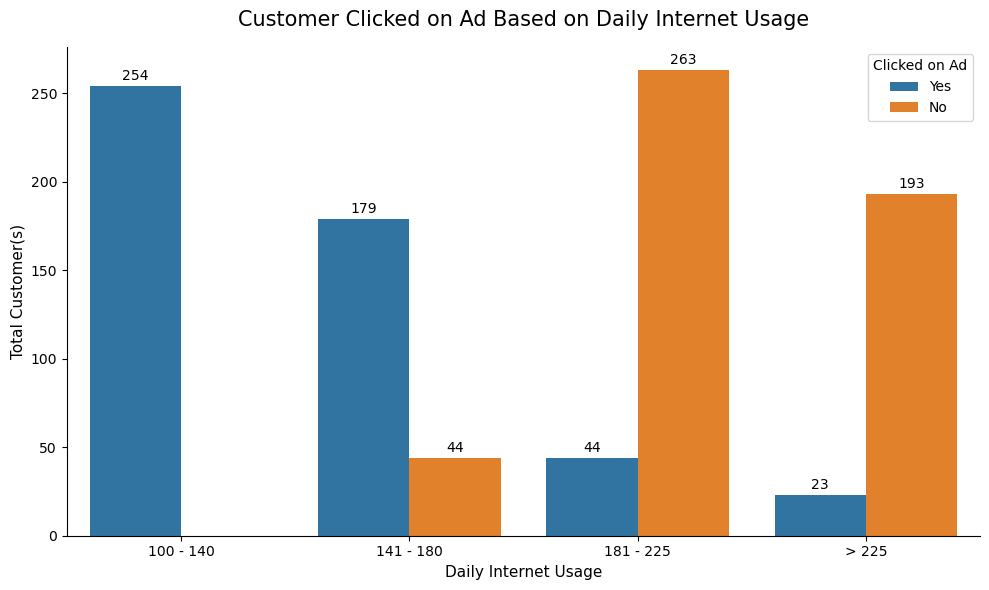

In [334]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Customer Clicked on Ad Based on Daily Internet Usage", fontsize=15, pad=15)
sns.barplot(x='diu_group', y='Customers', data=dfd, hue='Clicked on Ad')

plt.xlabel('Daily Internet Usage', fontsize=11)
plt.ylabel('Total Customer(s)', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()

### Daily Time Spent on Site Grouping

In [329]:
dts = []
for x in df4['Daily Time Spent on Site']:
    if x >= 30 and x <= 50:
      stage = '30 - 50'
    elif x >= 51 and x <= 70:
      stage = '51 - 70'
    else:
      stage = '> 70'
    dts.append(stage)
df4['dts_group'] = dts

In [330]:
dfs = df4.groupby(['Clicked on Ad', 'dts_group']).agg({'Age':'count'}).reset_index()
dfs = dfs.rename(columns={'Age':'Customers'})
dfs['sum'] = dfs['Customers'].sum()
dfs['percentage'] = round((dfs['Customers']/dfs['sum'])*100, 3)
dfs.sort_values(by=['Clicked on Ad'], ascending=False, inplace=True)
dfs

,Clicked on Ad,dts_group,Customers,sum,percentage
3,Yes,30 - 50,229,1000,22.9
4,Yes,51 - 70,196,1000,19.6
5,Yes,> 70,75,1000,7.5
0,No,30 - 50,2,1000,0.2
1,No,51 - 70,90,1000,9.0
2,No,> 70,408,1000,40.8


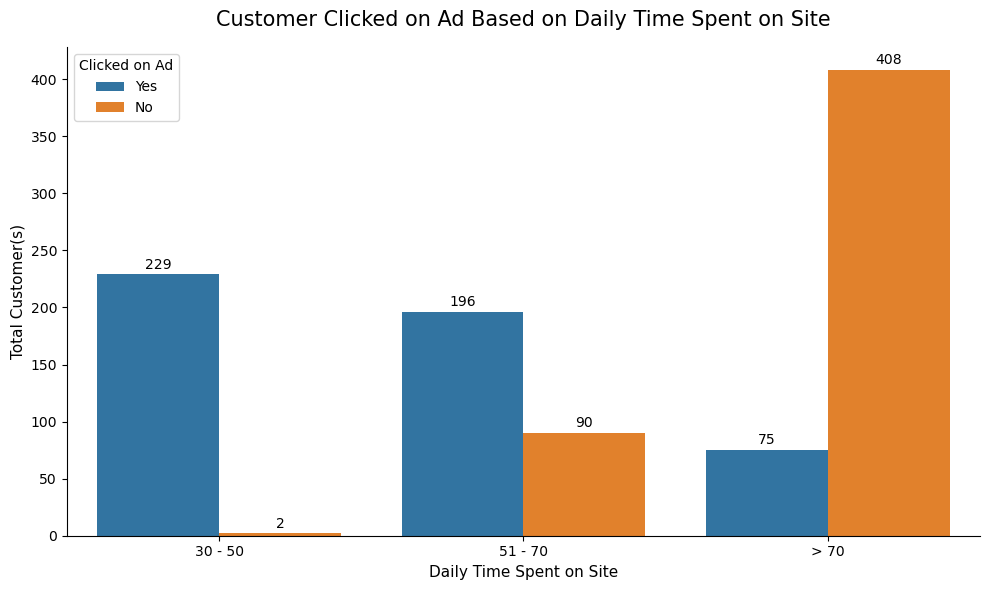

In [335]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Customer Clicked on Ad Based on Daily Time Spent on Site", fontsize=15, pad=15)
sns.barplot(x='dts_group', y='Customers', data=dfs, hue='Clicked on Ad')

plt.xlabel('Daily Time Spent on Site', fontsize=11)
plt.ylabel('Total Customer(s)', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()